In [1012]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1013]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Pasta Arquivos

In [1014]:
#folder = '/home/diogo/dados_doutorado/thuany_plot/NBAN_g8_RGV/'
folder = '/media/diogo/THUANY/modelos/NBCP_g3/'
sta_1 = folder.split('/')[-2]
sta = sta_1.split('_g')[0]

# RF calculada

In [1015]:
RF_syn_lf_path = glob.glob(folder+'OUT/PDF.PRF.syn.out.1')
RF_syn_hf_path = glob.glob(folder+'OUT/PDF.PRF.syn.out.2')

In [1016]:
RF_syn_lf_file = np.genfromtxt(RF_syn_lf_path[0])
RF_syn_hf_file = np.genfromtxt(RF_syn_hf_path[0])

In [1017]:
RF_syn_lf_time = []
RF_syn_lf_data = []

for i,j in enumerate(RF_syn_lf_file):
    if j[2] != 0:
        RF_syn_lf_time.append(j[0])
        RF_syn_lf_data.append(j[1])

RF_syn_hf_time = []
RF_syn_hf_data = []

for i,j in enumerate(RF_syn_hf_file):
    if j[2] != 0:
        RF_syn_hf_time.append(j[0])
        RF_syn_hf_data.append(j[1])

# RF observada

In [1018]:
RF_obs_lf_file = glob.glob(folder+'PRFrftn_lf*')
RF_obs_hf_file = glob.glob(folder+'PRFrftn_hf*')

In [1019]:
RF_obs_lf_time = np.genfromtxt(RF_obs_lf_file[0])[:,0]
RF_obs_lf_data = np.genfromtxt(RF_obs_lf_file[0])[:,1]

RF_obs_hf_time = np.genfromtxt(RF_obs_hf_file[0])[:,0]
RF_obs_hf_data = np.genfromtxt(RF_obs_hf_file[0])[:,1]

# SWD calculada

In [1020]:
SWD_syn_file = np.genfromtxt(folder+'OUT/PDF.RGV.syn.out.3')

In [1021]:
SWD_syn_time = []
SWD_syn_data = []

for i,j in enumerate(SWD_syn_file):
    if j[2] != 0:
        SWD_syn_time.append(j[0])
        SWD_syn_data.append(j[1])

# SWD observada

In [1022]:
SWD_obs_file = glob.glob(folder+'RGV*')

In [1023]:
SWD_obs_time = np.genfromtxt(SWD_obs_file[0])[:,0]
SWD_obs_data = np.genfromtxt(SWD_obs_file[0])[:,1]

# Scalar factor

In [1024]:
SF_file = glob.glob(folder+'OUT/*weight*')

In [1025]:
SF_file_S = sorted(SF_file)

In [1026]:
SF = [[]]*len(SF_file_S)
for i,j in enumerate(SF_file_S):
    SF[i] = np.genfromtxt(j)

In [1027]:
SF_1_time = []
SF_1_data = []
for i,j in enumerate(SF[0]):
    SF_1_time.append(j[0])
    SF_1_data.append(j[1])

In [1028]:
SF_2_time = []
SF_2_data = []
for i,j in enumerate(SF[1]):
    SF_2_time.append(j[0])
    SF_2_data.append(j[1])

In [1029]:
SF_3_time = []
SF_3_data = []
for i,j in enumerate(SF[2]):
    SF_3_time.append(j[0])
    SF_3_data.append(j[1])

# PDF Vs Model 

In [1030]:
PDF_Vs_path = glob.glob(folder+'OUT/*_vs*')

In [1031]:
PDF_Vs_file = np.genfromtxt(PDF_Vs_path[0])

In [1032]:
PDF_Vs_depth = []
PDF_Vs_data = []

for i,j in enumerate(PDF_Vs_file):
    if j[2] != 0:
        PDF_Vs_depth.append(j[0]*(-1))
        PDF_Vs_data.append(j[1])

# PDF Vs e VpVs AVG 

In [1033]:
PDF_Vs_AVG_path = glob.glob(folder+'OUT/*AVG*')

In [1034]:
PDF_Vs_AVG_file = np.genfromtxt(PDF_Vs_AVG_path[0])

In [1035]:
PDF_Vs_AVG_depth = []
PDF_Vs_AVG_data = []
PDF_Vs_AVG_erro = []
PDF_VpVs_AVG_data = []
PDF_VpVs_AVG_erro = []

for i,j in enumerate(PDF_Vs_AVG_file):
        PDF_Vs_AVG_depth.append(j[0]*(-1))
        PDF_Vs_AVG_data.append(j[1])
        PDF_Vs_AVG_erro.append(j[2])
        PDF_VpVs_AVG_data.append(j[3])
        PDF_VpVs_AVG_erro.append(j[4])

In [1036]:
PDF_Vs_AVG_data_sigma_mais = []
PDF_Vs_AVG_data_sigma_menos = []
PDF_VpVs_AVG_data_sigma_mais = []
PDF_VpVs_AVG_data_sigma_menos = []
for i,j in enumerate(PDF_Vs_AVG_data):
    PDF_Vs_AVG_data_sigma_mais.append(j + 3*PDF_Vs_AVG_erro[i])
    PDF_Vs_AVG_data_sigma_menos.append(j - 3*PDF_Vs_AVG_erro[i])
    PDF_VpVs_AVG_data_sigma_mais.append(PDF_VpVs_AVG_data[i] + PDF_VpVs_AVG_erro[i])
    PDF_VpVs_AVG_data_sigma_menos.append(PDF_VpVs_AVG_data[i] - PDF_VpVs_AVG_erro[i])

# Rosana Vs Model 

In [1037]:
Model_Vs_path = glob.glob(folder+'*model.6.*')

In [1038]:
Model_Vs_depth = np.genfromtxt(Model_Vs_path[0],usecols=[1])
Model_Vs_data_str = np.genfromtxt(Model_Vs_path[0],dtype='str',usecols=[0])

In [1039]:
Model_Vs_data = []
for i,j in enumerate(Model_Vs_data_str):
    Model_Vs_data.append(float(j[:-5]))

# PDF VpVs Model 

In [1040]:
PDF_VpVs_path = glob.glob(folder+'OUT/*_vpvs*')

In [1041]:
PDF_VpVs_file = np.genfromtxt(PDF_VpVs_path[0])

In [1042]:
PDF_VpVs_depth = []
PDF_VpVs_data = []

for i,j in enumerate(PDF_VpVs_file):
    if j[2] != 0:
        PDF_VpVs_depth.append(j[0]*(-1))
        PDF_VpVs_data.append(j[1])

## Gráficos 

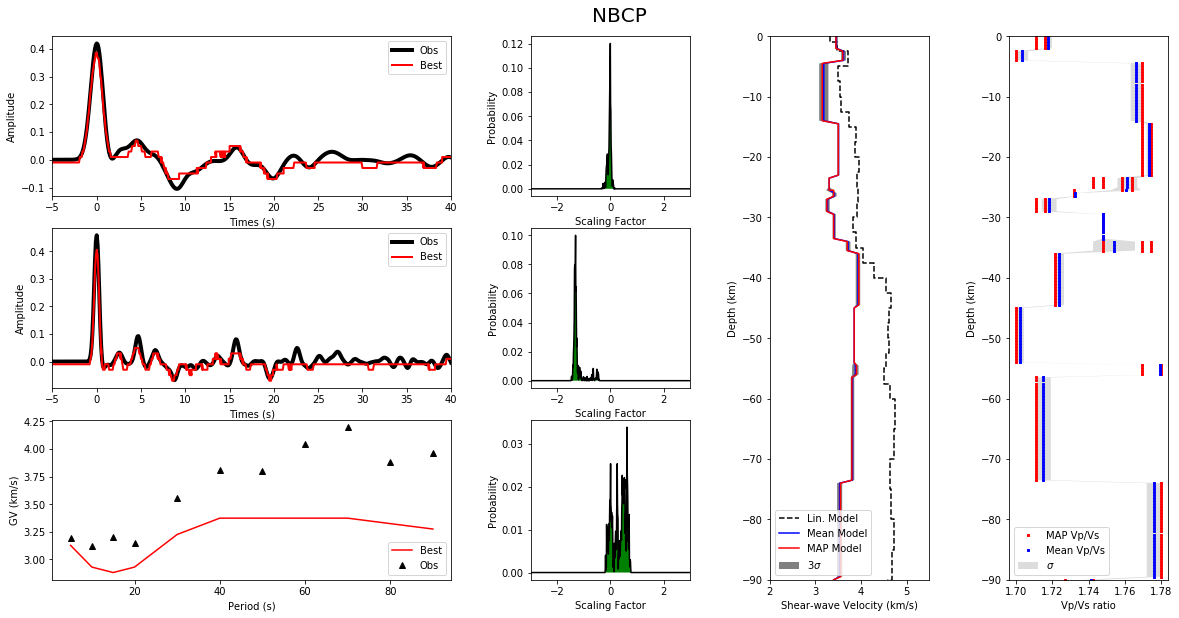

In [1043]:
fig = plt.figure(figsize=(20,10))
gs = plt.GridSpec(3, 5,width_ratios=[1,1,1,1,1],wspace=0.5,hspace=0.2)

ax1 = plt.subplot(gs[0, :2])
ax1.plot(RF_obs_lf_time,RF_obs_lf_data,'k',lw=4,label='Obs')
ax1.plot(RF_syn_lf_time,RF_syn_lf_data,'r',lw=2,label='Best')
ax1.legend(loc=0)
ax1.set_xlim(-5,40)
ax1.set_xlabel('Times (s)')
ax1.set_ylabel('Amplitude')


ax2 = plt.subplot(gs[1, :2])
ax2.plot(RF_obs_hf_time,RF_obs_hf_data,'k',lw=4,label='Obs')
ax2.plot(RF_syn_hf_time,RF_syn_hf_data,'r',lw=2,label='Best')
ax2.legend(loc=0)
ax2.set_xlim(-5,40)
ax2.set_xlabel('Times (s)')
ax2.set_ylabel('Amplitude')

ax3 = plt.subplot(gs[2, :2])
ax3.plot(SWD_syn_time,SWD_syn_data,'-r',label='Best')
ax3.plot(SWD_obs_time,SWD_obs_data,'^k',label='Obs')
ax3.legend(loc=4)
ax3.set_xlabel('Period (s)')
ax3.set_ylabel('GV (km/s)')
    
ax4 = plt.subplot(gs[0, 2:3])
ax4.plot(SF_1_time,SF_1_data,'-k')
ax4.fill_between(SF_1_time,SF_1_data,facecolor='g')
ax4.set_xlim(-3,3)
ax4.set_xlabel('Scaling Factor')
ax4.set_ylabel('Probability')

ax5 = plt.subplot(gs[1, 2:3]) 
ax5.plot(SF_2_time,SF_2_data,'-k')
ax5.fill_between(SF_2_time,SF_2_data,facecolor='g')
ax5.set_xlim(-3,3)
ax5.set_xlabel('Scaling Factor')
ax5.set_ylabel('Probability')

ax6 = plt.subplot(gs[2, 2:3])    
ax6.plot(SF_3_time,SF_3_data,'-k')
ax6.fill_between(SF_3_time,SF_3_data,facecolor='g')
ax6.set_xlim(-3,3)
ax6.set_xlabel('Scaling Factor')
ax6.set_ylabel('Probability')
    
ax7 = plt.subplot(gs[:, 3])
ax7.plot(Model_Vs_data,Model_Vs_depth,'--k',label='Lin. Model')
ax7.plot(PDF_Vs_AVG_data,PDF_Vs_AVG_depth,'b',label='Mean Model')
ax7.plot(PDF_Vs_data,PDF_Vs_depth,'r',label='MAP Model')
ax7.fill_betweenx(PDF_Vs_AVG_depth,PDF_Vs_AVG_data_sigma_menos,PDF_Vs_AVG_data_sigma_mais,facecolor='grey',label='3'+r'$\sigma$')
ax7.legend(loc=3)
ax7.set_ylim(-90,0)
ax7.set_xlim(2,5.5)
ax7.set_xlabel('Shear-wave Velocity (km/s)')
ax7.set_ylabel('Depth (km)')

ax8 = plt.subplot(gs[:, 4])  
ax8.plot(PDF_VpVs_data,PDF_VpVs_depth,'sr',label='MAP Vp/Vs',markersize=2)
ax8.plot(PDF_VpVs_AVG_data,PDF_Vs_AVG_depth,'sb',label='Mean Vp/Vs',markersize=2)
ax8.fill_betweenx(PDF_Vs_AVG_depth,PDF_VpVs_AVG_data_sigma_menos,PDF_VpVs_AVG_data_sigma_mais,facecolor='gainsboro',label=r'$\sigma$')
ax8.legend(loc=0)
ax8.set_ylim(-90,0)
ax8.set_xlabel('Vp/Vs ratio')
ax8.set_ylabel('Depth (km)')

fig.text(0.5,0.9,sta,fontsize=20)
fig.savefig(folder+sta+'_ind.pdf',dpi=300)